In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2025-05-15 / Aki Taanila


# Aikasarjojen kuvailua ja analysointia

Tässä muistiossa noudetaan dataa Yahoo Finance -palvelusta **yfinance**-paketin avulla. **yfinance**-kirjaston asennus Minicondan ja Anacondan käyttäjille komentorivin kautta: `pip install yfinance`. Lisätietoa https://github.com/ranaroussi/yfinance.

Jos tiedon hakuu Yahoo Finance -palvelusta ei onnistu, niin kannattaa päivittää yfinance uusimpaan versioon. Minicondan/Anacondan komentorivillä päivityksen voi tehdä komennolla `pip install yfinance --upgrade`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Tätä tarvitaan datan noutamiseen Yahoo Finance -palvelusta
import yfinance as yf

## Datojen nouto

Yahoo Finance -palvelu https://finance.yahoo.com/ sisältää tietoa osakkeista, valuutoista, raaka-aineista jne. Jos esimerkiksi haen palvelusta hakusanalla **elisa**, niin minulle selviää, että Elisan tunnus on **ELISA.HE**. Vastaavasti Telian tunnukseksi löydän **TELIA1.HE**. Seuraavassa haen Elisan ja Telian osakkeiden päivän päätöshinnat ja muita historiatietoja tähän päivään saakka.

Joka kerta kun suoritan koodin, saan mukaan myös tuoreimmat tiedot. Jos tiedot on haettu kesken kaupantekopäivän, niin viimeisin hinta on noin 15 minuuttia hakuajankohtaa aikaisempi hinta.

Parametri `auto_adjust` määrittää Close-sarakkeen hintojen tyypin. Oletusarvo on `True`, jolloin käytetään adjusted-hintoja. Katso https://www.investopedia.com/terms/a/adjusted_closing_price.asp

In [3]:
elisa = yf.download('ELISA.HE', start='2020-1-1', auto_adjust=False)
telia = yf.download('TELIA1.HE', start='2020-1-1', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Datan alku- ja loppuosa
elisa

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE
Date,,,,,,
2020-01-02,39.355034,49.279999,49.520000,49.160000,49.250000,194976
2020-01-03,39.754333,49.779999,50.040001,49.290001,49.400002,335732
2020-01-07,39.642529,49.639999,50.299999,49.450001,49.880001,452005
2020-01-08,39.378994,49.310001,49.630001,49.160000,49.500000,365059
2020-01-09,39.674473,49.680000,49.930000,49.419998,49.430000,622106
...,...,...,...,...,...,...
2025-05-09,46.080002,46.080002,46.759998,46.060001,46.560001,344069
2025-05-12,44.939999,44.939999,46.020000,44.520000,46.000000,385044


In [5]:
# Datan alku- ja loppuosa
telia

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE
Date,,,,,,
2020-01-02,0.053299,3.886,3.902,3.871,3.880,1140539
2020-01-03,0.053216,3.880,3.880,3.842,3.870,1093685
2020-01-07,0.052942,3.860,3.880,3.837,3.869,715962
2020-01-08,0.052695,3.842,3.850,3.818,3.848,818281
2020-01-09,0.053258,3.883,3.908,3.860,3.860,1151012
...,...,...,...,...,...,...
2025-05-09,3.279000,3.279,3.330,3.273,3.314,217868
2025-05-12,3.224000,3.224,3.295,3.210,3.279,430082


## Viivakaavioita

<Axes: title={'center': 'Telia'}, xlabel='Date'>

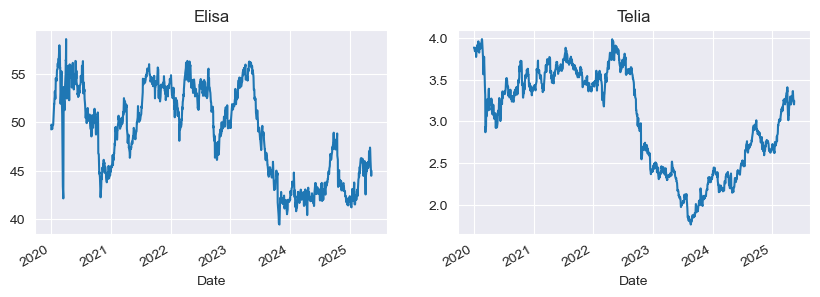

In [6]:
# Osakkeen hinnan kehitys koko aikavälillä
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].plot(ax=axs[0], title='Elisa', legend=False)
telia['Close'].plot(ax=axs[1], title='Telia', legend=False)

<Axes: title={'center': 'Telia'}, xlabel='Date'>

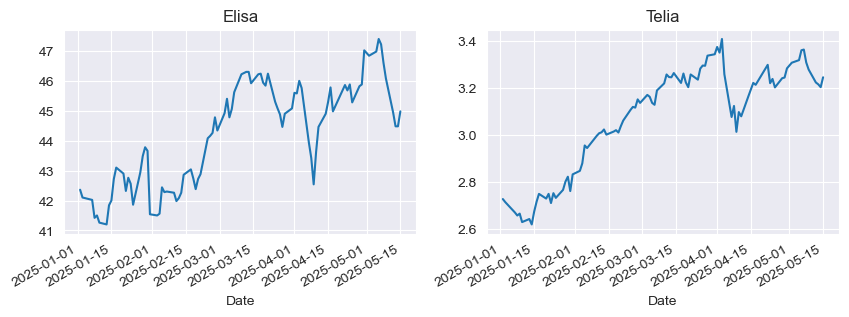

In [7]:
# Kehitys vuoden 2025 alusta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close']['2025':].plot(ax=axs[0], title='Elisa', legend=False)
telia['Close']['2025':].plot(ax=axs[1], title='Telia', legend=False)

## Aggregointi

**resample**-funktio aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample-funktion parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<Axes: title={'center': 'Telia kuukausittain'}, xlabel='Date'>

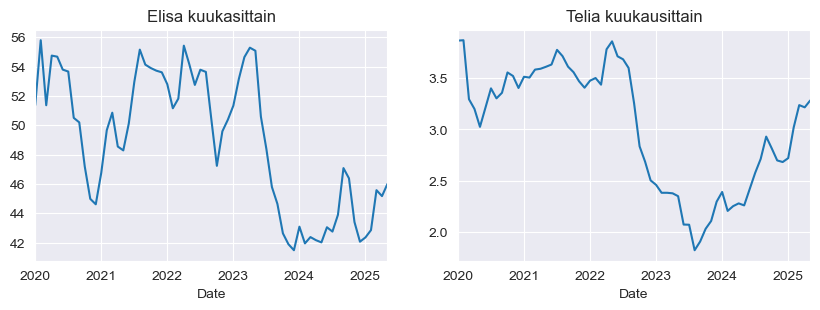

In [8]:
# Päivän päätöshintojen aggregointi kuukausitasolle keskiarvoja (mean) käyttäen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('ME').mean().plot(ax=axs[0], title='Elisa kuukasittain', legend=False)
telia['Close'].resample('ME').mean().plot(ax=axs[1], title='Telia kuukausittain', legend=False)

<Axes: title={'center': 'Telia vuosineljänneksittäin'}, xlabel='Date'>

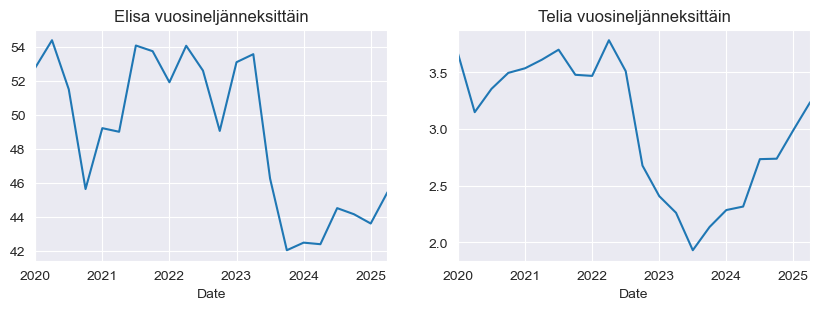

In [9]:
# Päivän päätöshintojen aggregointi vuosineljännestasolle keskiarvoja käyttäen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('QE').mean().plot(ax=axs[0], title='Elisa vuosineljänneksittäin', legend=False)
telia['Close'].resample('QE').mean().plot(ax=axs[1], title='Telia vuosineljänneksittäin', legend=False)

<Axes: title={'center': 'Telian vaihto vuosineljänneksittäin'}, xlabel='Date'>

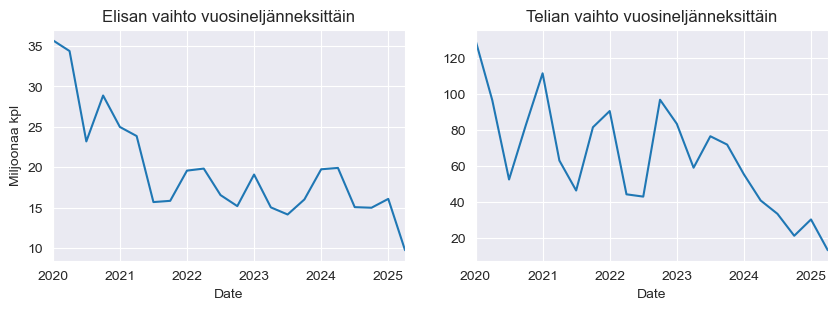

In [10]:
# Osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin (aggregointi summaa käyttäen)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(elisa['Volume']/1000000).resample('QE').sum().plot(ax=axs[0], title='Elisan vaihto vuosineljänneksittäin', ylabel='Miljoonaa kpl', legend=False)
(telia['Volume']/1000000).resample('QE').sum().plot(ax=axs[1], title='Telian vaihto vuosineljänneksittäin', legend=False)

## Liukuvia keskiarvoja

Liukuvilla keskiarvoilla tasoitetaan satunnaisia piikkejä. Liukuvien tunnuslukujen laskenta onnistuu **rolling**-funktiolla.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään joissain tilanteissa osto- ja myyntisignaaleina.
Lisätietoa https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

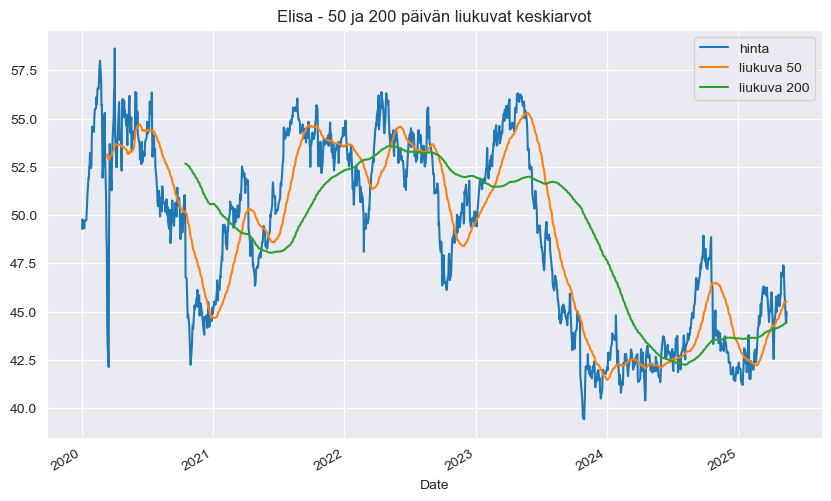

In [11]:
# Elisan päätöshinnat
ax = (elisa['Close']).plot(figsize=(10, 6), title='Elisa - 50 ja 200 päivän liukuvat keskiarvot')

# Elisan päätöshintojen 50 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot(ax=ax)

# Elisan päätöshintojen 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(200).mean().plot(ax=ax)

ax.legend(['hinta', 'liukuva 50 ', 'liukuva 200'])

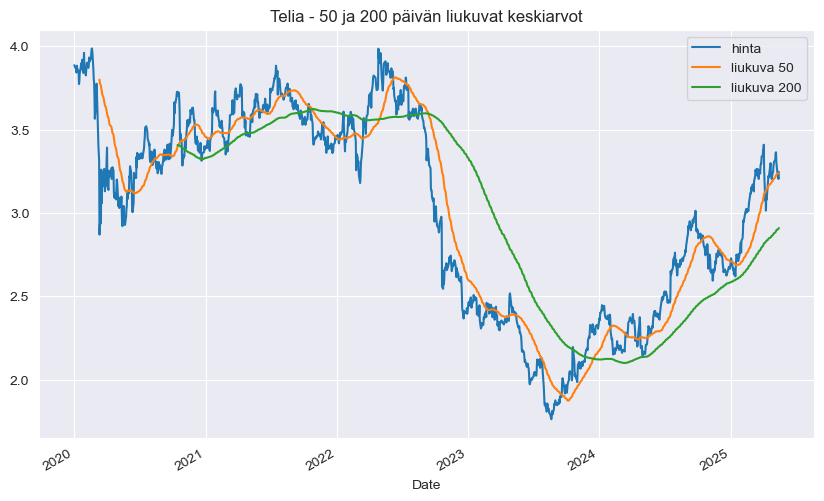

In [12]:
# Telian päätöshinnat
ax = telia['Close'].plot(figsize=(10, 6), title='Telia - 50 ja 200 päivän liukuvat keskiarvot')

# Telian päätöshintojen 50 päivän liukuvat keskiarvot
telia['Close'].rolling(50).mean().plot(ax=ax)

# Telian päätöshintojen 200 päivän liukuvat keskiarvot
telia['Close'].rolling(200).mean().plot(ax=ax)

ax.legend(['hinta', 'liukuva 50 ', 'liukuva 200'])

## Tuottoprosentit

Tuottoprosentit lasketaan **pct_change**-funktiolla. Tulos on desimaalimuodossa; tarvittaessa saan prosenttiluvut kertomalla luvulla 100.

In [13]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

# Tarkistetaan laskennan onnistuminen
elisa

Price,Adj Close,Close,High,Low,Open,Volume,Elisa%
Ticker,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,
Date,,,,,,,
2020-01-02,39.355034,49.279999,49.520000,49.160000,49.250000,194976,NaN
2020-01-03,39.754333,49.779999,50.040001,49.290001,49.400002,335732,0.010146
2020-01-07,39.642529,49.639999,50.299999,49.450001,49.880001,452005,-0.002812
2020-01-08,39.378994,49.310001,49.630001,49.160000,49.500000,365059,-0.006648
2020-01-09,39.674473,49.680000,49.930000,49.419998,49.430000,622106,0.007504
...,...,...,...,...,...,...,...
2025-05-09,46.080002,46.080002,46.759998,46.060001,46.560001,344069,-0.011159
2025-05-12,44.939999,44.939999,46.020000,44.520000,46.000000,385044,-0.024740


In [14]:
# Tarkistetaan laskennan onnistuminen myös Telian kohdalta
telia

Price,Adj Close,Close,High,Low,Open,Volume,Telia%
Ticker,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,
Date,,,,,,,
2020-01-02,0.053299,3.886,3.902,3.871,3.880,1140539,NaN
2020-01-03,0.053216,3.880,3.880,3.842,3.870,1093685,-0.001544
2020-01-07,0.052942,3.860,3.880,3.837,3.869,715962,-0.005155
2020-01-08,0.052695,3.842,3.850,3.818,3.848,818281,-0.004663
2020-01-09,0.053258,3.883,3.908,3.860,3.860,1151012,0.010671
...,...,...,...,...,...,...,...
2025-05-09,3.279000,3.279,3.330,3.273,3.314,217868,-0.009066
2025-05-12,3.224000,3.224,3.295,3.210,3.279,430082,-0.016773


**Logaritmiset tuotot**

Usein tuottoprosentin sijasta käytetään logaritmisia tuottoja. Logaritminen tuotto saadaan jakamalla päivän hinta edellisen päivän hinnalla ja ottamalla tuloksesta luonnollinen logaritmi. Logaritmiset tuotot eivät poikkea kovin paljoa tuottoprosenteista, mutta niillä on puolellaan kaksi etua:

* Ne noudattavat paremmin normaalijakaumaa kuin tuottoprosentit ja tästä on hyötyä tilastollisissa analyyseissä.
* Logaritmiset tuotot ovat additiviivisia. Peräkkäisten jaksojen tuottoprosenttien summa ei ole sama kuin jaksojen kokonaistuottoprosentti (esimerkiksi kahta peräkkäistä 10 % tuottoa vastaava kokonaistuotto on 21 %). Sen sijaan peräkkäisten logaritmisten tuottojen summa on sama kuin jaksojen logaritminen kokonaistuotto.

Logaritmiset tuotot voit laskea korvaamalla edellisen solun koodin seuraavalla:

`from numpy import log`<br>
`elisa['Elisa%'] = log(elisa['Close'].pct_change() + 1)`<br>
`telia['Telia%'] = log(telia['Close'].pct_change() + 1)`


In [15]:
# Muodostan Elisan ja Telian tuottoprosenteista uuden datan
tuotot = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin tuottoprosenteissakin on puuttuvia arvoja
# Ne kannattaa korvata tuottoprosentilla 0 käyttäen fillna-toimintoa
tuotot = tuotot.fillna(0)

# Tarkistetaan lopputulos
tuotot

,Elisa%,Telia%
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,0.010146,-0.001544
2020-01-07,-0.002812,-0.005155
2020-01-08,-0.006648,-0.004663
2020-01-09,0.007504,0.010671
...,...,...
2025-05-09,-0.011159,-0.009066
2025-05-12,-0.024740,-0.016773
2025-05-13,-0.010236,-0.002481


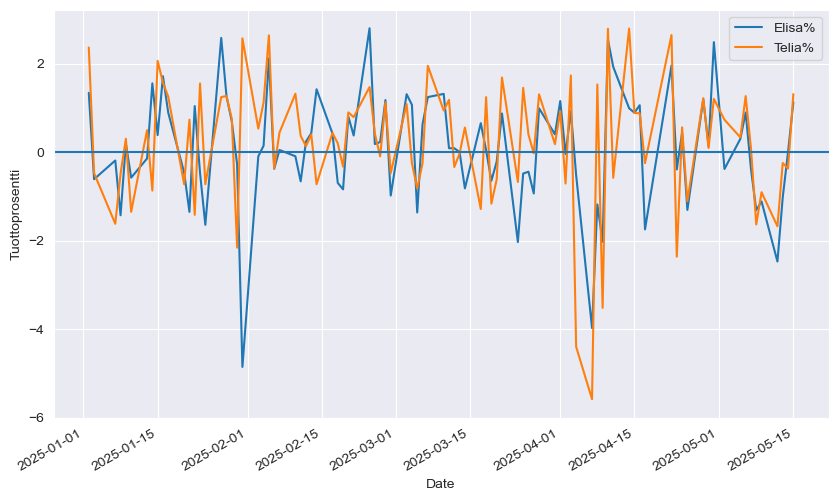

In [16]:
# Elisan ja Telian päivittäiset tuottoprosentit vuoden 2025 alusta
(tuotot['2025':]*100).plot(figsize=(10, 6))

plt.ylabel('Tuottoprosentti')

# Vaakaviiva nollan kohdalle; tuottoprosentit vaihtelevat nollan molemmin puolin
plt.axhline()

In [17]:
# Tilastollisia tunnuslukuja tuottoprosenteille
(tuotot*100).describe().round(2)

,Elisa%,Telia%
count,1351.00,1351.00
mean,0.00,-0.00
std,1.29,1.51
min,-8.41,-13.45
25%,-0.59,-0.71
50%,0.04,0.04
75%,0.67,0.76
max,16.40,11.00


Text(0, 0.5, 'Tuottoprosentti')

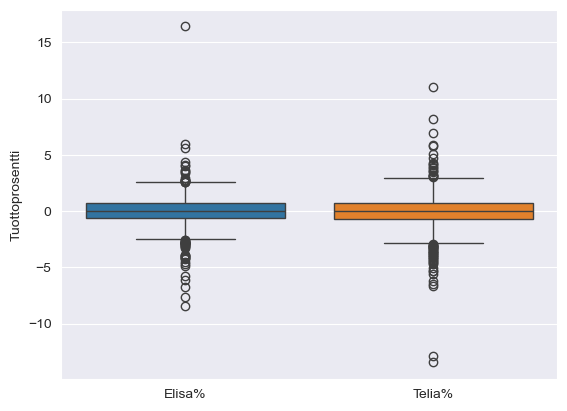

In [18]:
# Tunnuslukujen vertailua graafisesti
sns.boxplot(data=tuotot*100)
plt.ylabel('Tuottoprosentti')

In [19]:
# Päivät, jolloin tuottoprosentti on jommallakummalla osakkeella ollut suurempi kuin 6 %
tuotot[(abs(tuotot['Elisa%'])>0.06) | (abs(tuotot['Telia%'])>0.06)]

,Elisa%,Telia%
Date,,
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963
2020-04-03,-0.076739,-0.066333
2020-10-16,-0.061020,0.005671
2022-10-21,-0.018935,-0.128406
2023-10-19,-0.067709,0.082260
2024-07-18,0.011945,0.069383


## Tuottoprosenttien välinen korrelaatio

In [20]:
# Elisan ja Telian tuottoprosentit korreloivat positiivisesti
tuotot.corr()

,Elisa%,Telia%
Elisa%,1.000000,0.489239
Telia%,0.489239,1.000000


<Axes: xlabel='Elisa%', ylabel='Telia%'>

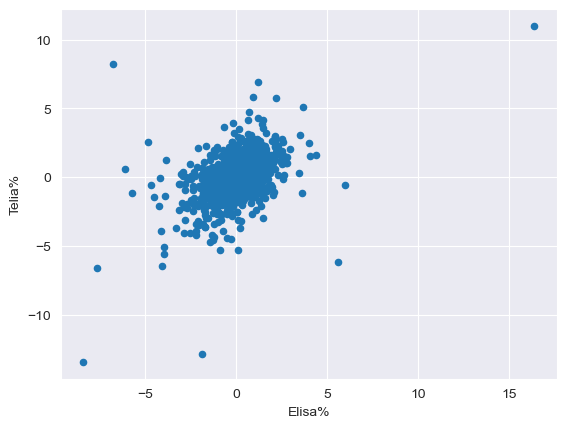

In [21]:
# Tuottoprosenttien välinen positiivinen korrelaatio näkyy myös hajontakaaviossa
(tuotot*100).plot(kind='scatter', x='Elisa%', y='Telia%')

<Axes: xlabel='Date'>

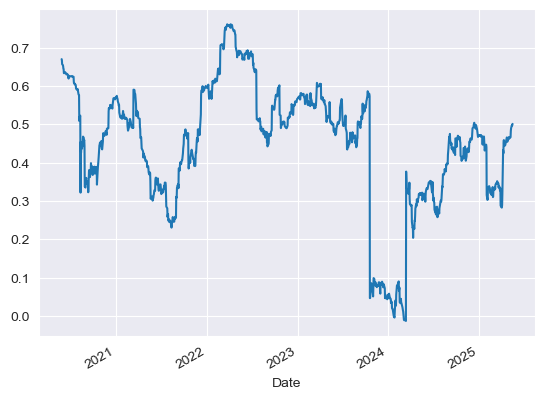

In [22]:
# Liukuva korrelaatio kertoo miten tuottoprosentit korreloivat eri aikoina
tuotot['Elisa%'].rolling(100).corr(tuotot['Telia%']).plot()

## Liukuva volatiliteetti

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti lasketaan päivittäisten tuottoprosenttien keskihajontana (std-funktiolla) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella (sama kuin korotus potenssiin 0.5). Vuoteen sisältyvien kaupantekopäivien lukumääränä käytän arvoa 252 vaikka kaupantekopäivien lukumäärässä on pientä vaihtelua vuosien välillä.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

<Axes: xlabel='Date'>

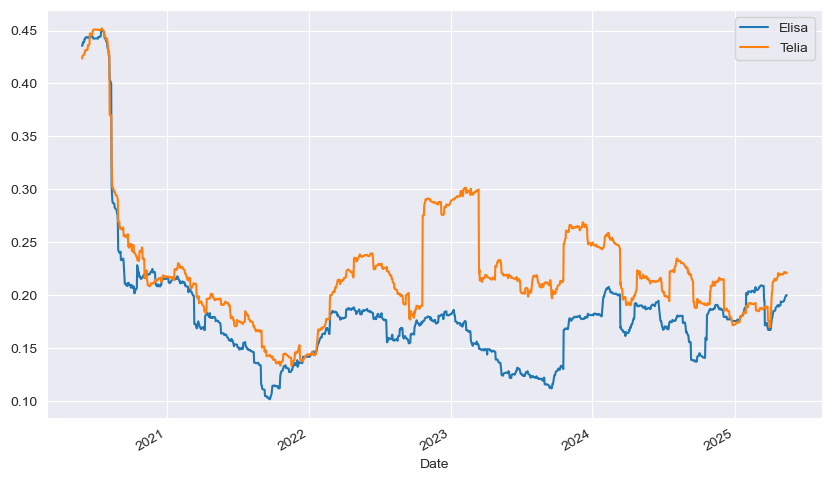

In [23]:
# 100 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(tuotot['Elisa%'].rolling(100).std() * (252**0.5)).plot(label='Elisa', legend=True)
(tuotot['Telia%'].rolling(100).std() * (252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

Seuraavassa käytän värimäärityksiä 'C0' ja 'C1', jotka tarkoittavat oletuspaletin ensimmäistä ja toista väriä. Lisätietoa väreistä https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 1.0, 'Elisan ja Telian osakkeiden hinnan kehitys')

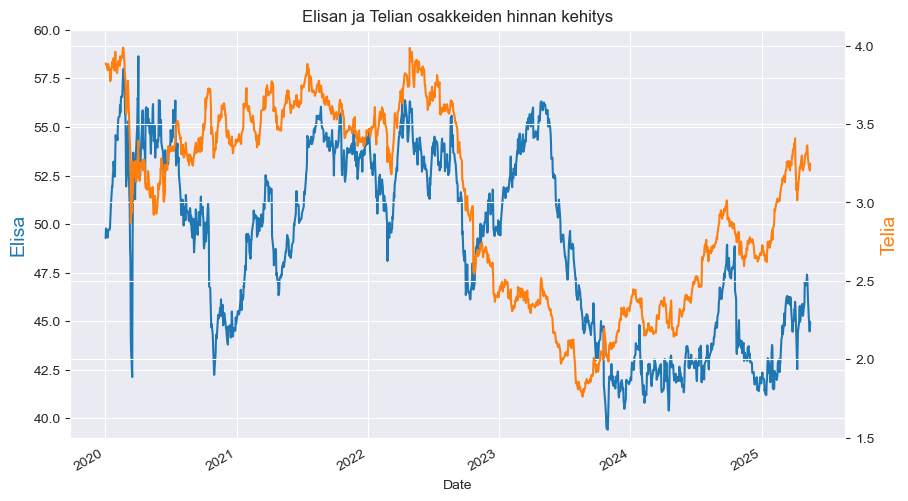

In [24]:
# Viivakaavio Elisan päätöshinnoista
eli = elisa['Close'].plot(figsize=(10, 6), legend=False)

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color='C0', fontsize=14)

# Elisan arvoakselin skaalaus (luvut valitaan läheltä pienintä ja suurinta päätöshintaa)
plt.ylim(39, 60)

# Luon Telialle kaavion (tel), jolla on yhteinen x-akseli Elisan kaavion kanssa
tel = eli.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax=tel, color='C1', legend=False)

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color='C1', fontsize=14)

# Telian arvoakselin skaalaus
plt.ylim(1.5, 4.1)

plt.title('Elisan ja Telian osakkeiden hinnan kehitys')

<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [25]:
viikonpaivat = ['ma', 'ti', 'ke', 'to', 'pe']

tuotot['Weekday'] = tuotot.index.weekday

df1 = (tuotot*100).groupby('Weekday')['Elisa%'].describe()
df1.index = viikonpaivat
df1

,count,mean,std,min,25%,50%,75%,max
ma,267.0,0.072176,1.188860,-4.507923,-0.559921,0.185258,0.723643,3.426549
ti,276.0,0.038301,1.491768,-5.762565,-0.602389,0.044785,0.670044,16.401613
ke,275.0,0.036972,1.143972,-3.867992,-0.514006,-0.045291,0.603693,5.965581
to,271.0,-0.093258,1.251337,-8.407721,-0.705339,-0.036685,0.636207,4.008511
pe,262.0,-0.048468,1.342988,-7.673943,-0.529951,0.084478,0.702464,4.396686


In [26]:
# Testataan onko suurimman ja pienimmän keskiarvotuoton välillä merkitsevää eroa

# Vertailtavien ryhmien muodostaminen
suurin = tuotot['Elisa%'][tuotot['Weekday']==0]
pienin = tuotot['Elisa%'][tuotot['Weekday']==3]

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(suurin, pienin, equal_var=False, nan_policy='omit')

TtestResult(statistic=np.float64(1.5722427164355757), pvalue=np.float64(0.11648512318956727), df=np.float64(535.294932408319))

In [27]:
df2 = (tuotot*100).groupby('Weekday')['Telia%'].describe()
df2.index = viikonpaivat
df2

,count,mean,std,min,25%,50%,75%,max
ma,267.0,0.037387,1.372658,-6.435643,-0.650295,0.189389,0.843078,4.142419
ti,276.0,0.121850,1.440441,-4.492134,-0.615923,0.055902,0.860193,10.997615
ke,275.0,-0.032097,1.469353,-6.196316,-0.759171,-0.092223,0.701316,5.843288
to,271.0,-0.032874,1.713965,-13.449943,-0.756841,0.000000,0.739384,8.225973
pe,262.0,-0.108112,1.534716,-12.840602,-0.729823,0.013942,0.702605,3.150792


In [28]:
# Testataan onko suurimman ja pienimmän keskiarvotuoton välillä merkitsevää eroa

# Vertailtavien ryhmien muodostaminen
suurin = tuotot['Telia%'][tuotot['Weekday']==1]
pienin = tuotot['Telia%'][tuotot['Weekday']==4]

# Kahden riippumattoman (ind) otoksen t-testi
from scipy.stats import ttest_ind
ttest_ind(suurin, pienin, equal_var=False, nan_policy='omit')

TtestResult(statistic=np.float64(1.7898441007029573), pvalue=np.float64(0.07405086085016349), df=np.float64(528.9623835605746))

## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/